# Problem 1:

You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Dataset for Problem: Election_Data.xlsx


**Data Ingestion: 12 marks**

1. Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it. (5 Marks)

2. Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)


**Data Preparation: 5 marks**

1. Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (5 Marks)


**Modelling: 26 marks**

1. Apply Logistic Regression and LDA (linear discriminant analysis). (5 marks)

2. Apply KNN Model and Naïve Bayes Model. Interpret the results. (7 marks)

3. Model Tuning, Bagging (Random Forest should be applied for Bagging) and Boosting. (7 marks)

4. Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)


**Inference: 5 marks**

1. Based on these predictions, what are the insights? (5 marks)

In [180]:
# Load all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import nltk
import random
import string
from nltk.corpus import inaugural
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

# P1 : Election Data

**Data Ingestion**

1.1) Read the dataset. Do the descriptive statistics and do null value condition check.

In [181]:
# Data dictionary

d = pd.read_excel("Election_Data.xlsx")
d

,**Data Dictionary**
0,1. vote: Party choice: Conservative or Labour
1,2. age: in years
2,3. economic.cond.national: Assessment of curre...
3,4. economic.cond.household: Assessment of curr...
4,"5. Blair: Assessment of the Labour leader, 1 t..."
5,6. Hague: Assessment of the Conservative leade...
6,7. Europe: an 11-point scale that measures res...
7,8. political.knowledge: Knowledge of parties' ...
8,9. gender: female or male.


In [182]:
ED = pd.ExcelFile("Election_Data.xlsx")
df = ED.parse(sheet_name = 'Election_Dataset_Two Classes')

In [183]:
df.head(10)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
5,6,Labour,47,3,4,4,4,4,2,male
6,7,Labour,57,2,2,4,4,11,2,male
7,8,Labour,77,3,4,4,1,1,0,male
8,9,Labour,39,3,3,4,4,11,0,female
9,10,Labour,70,3,2,5,1,11,2,male


In [184]:
df.drop(columns = 'Unnamed: 0', inplace=True)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [186]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [187]:
df[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers. Interpret the inferences for each.

In [188]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [189]:
df.shape

(1525, 9)

In [190]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [191]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [192]:
for variable in cat:
    print(variable,":", sum(df[variable] == '?'))

vote : 0
gender : 0


In [193]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [194]:
df.drop_duplicates(inplace=True)

In [195]:
df.shape

(1517, 9)

In [196]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




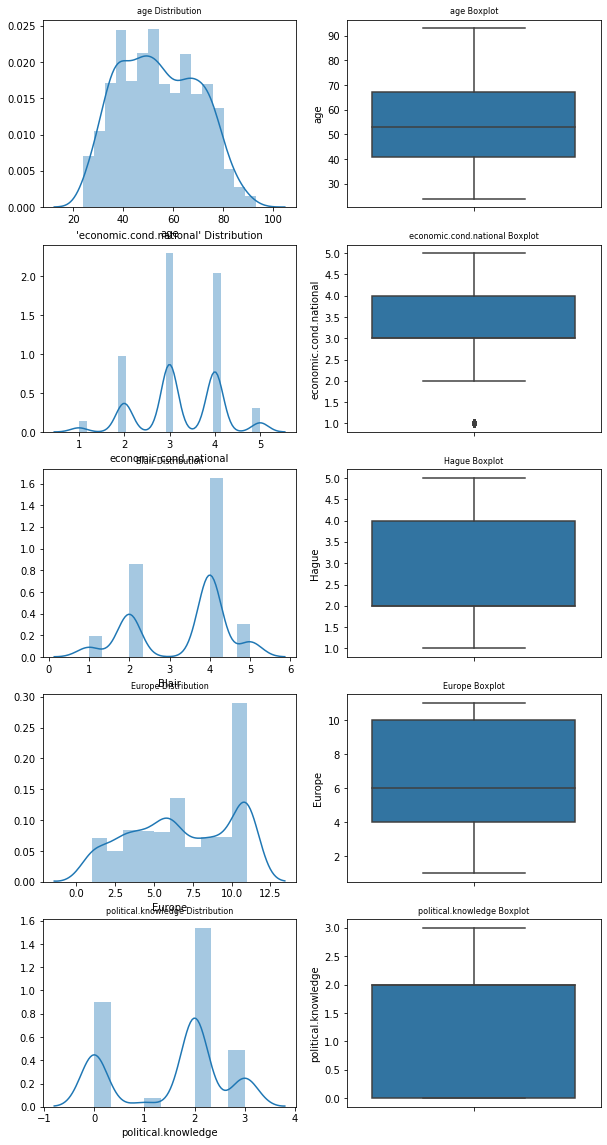

In [199]:
fig, axes = plt.subplots(nrows=5,ncols=2)           
fig.set_size_inches(10,20)

a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=8)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=8)

a = sns.distplot(df['economic.cond.national'] , ax=axes[1][0])
a.set_title("'economic.cond.national' Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.national'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.national Boxplot",fontsize=8)


a = sns.distplot(df['Blair'] , ax=axes[2][0])
a.set_title("Blair Distribution",fontsize=8)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[2][1])
a.set_title("Hague Boxplot",fontsize=8)


a = sns.distplot(df['Europe'] , ax=axes[3][0])
a.set_title("Europe Distribution",fontsize=8)

a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[3][1])
a.set_title("Europe Boxplot",fontsize=8)

a = sns.distplot(df['political.knowledge'] , ax=axes[4][0])
a.set_title("political.knowledge Distribution",fontsize=8)

a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[4][1])
a.set_title("political.knowledge Boxplot",fontsize=8)

plt.show()

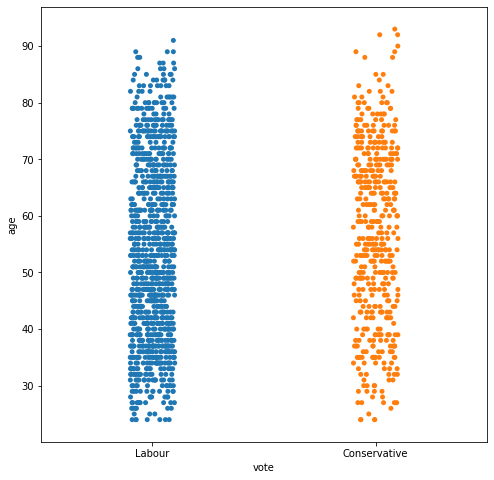

In [200]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['age'], jitter=True) 
plt.show()

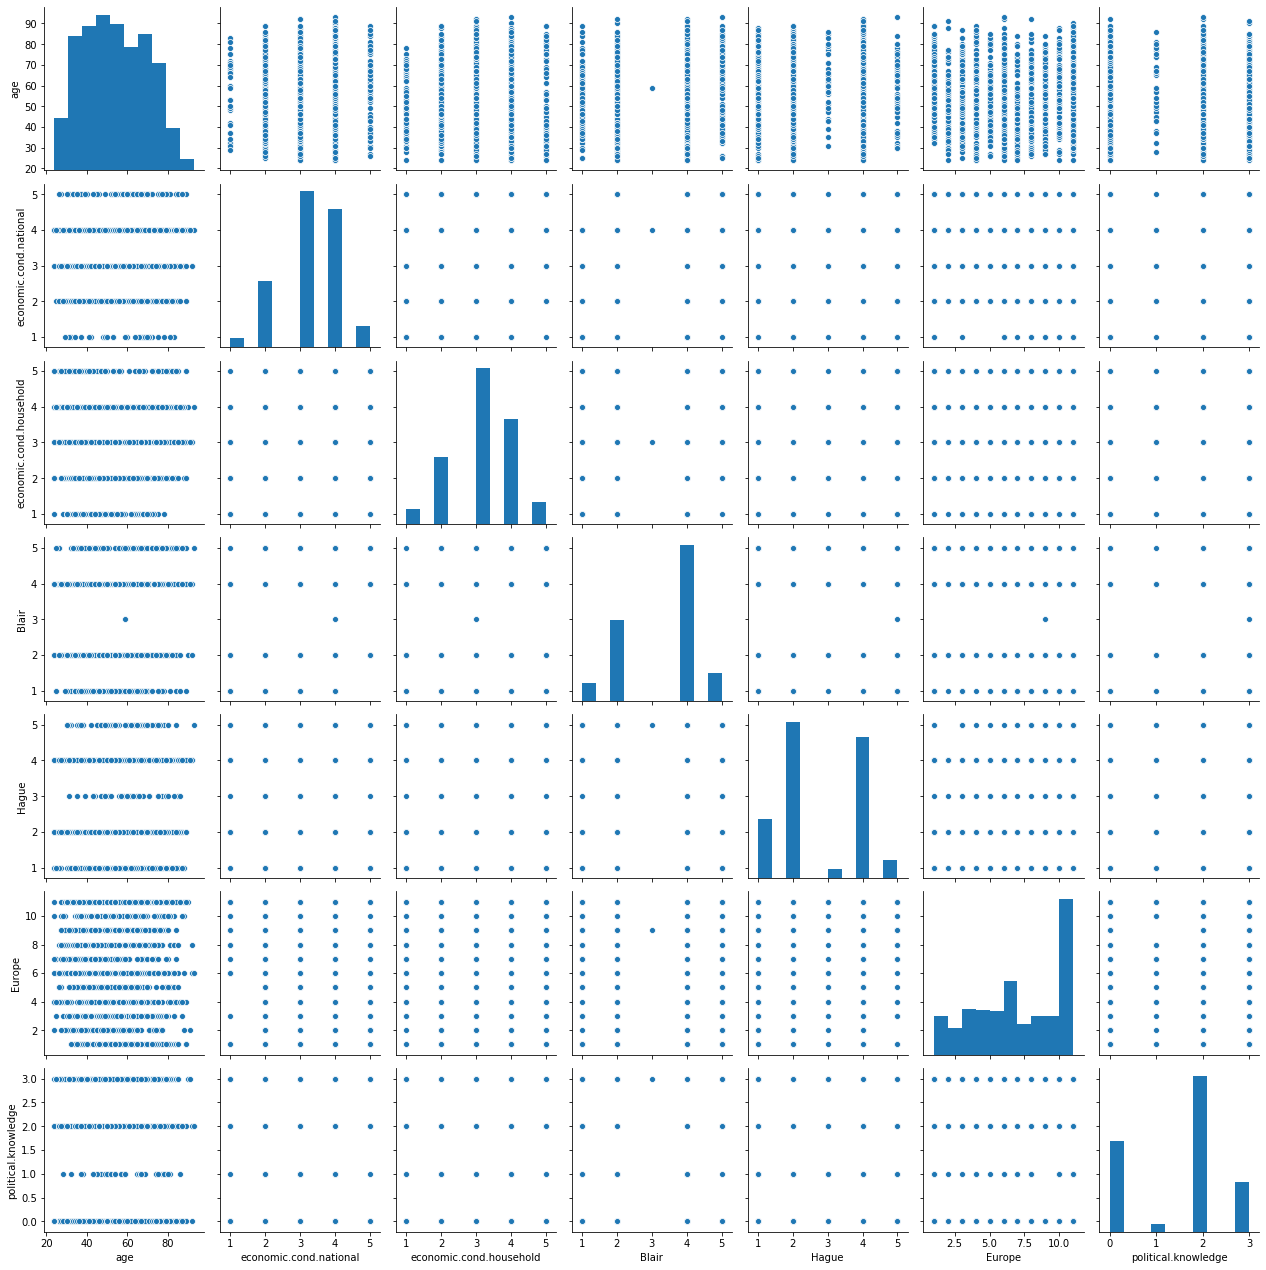

In [203]:
sns.pairplot(df)

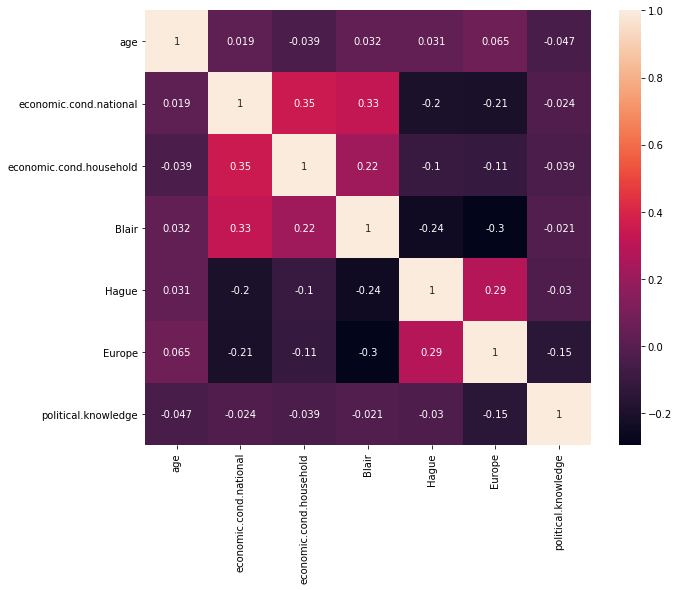

In [204]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

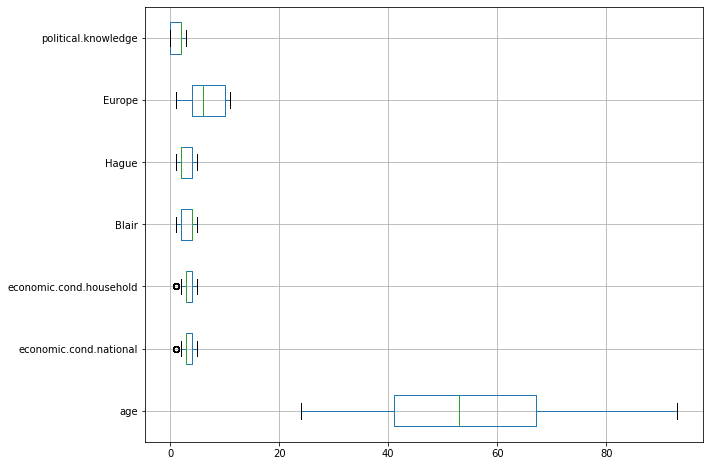

In [206]:
plt.figure(figsize=(10,8))
df[num].boxplot(vert=0)
plt.show()

In [207]:
# Checking for validity of outliers

Q1 = df.quantile(0.25) # Getting First quantile for all numerical variables
Q3 = df.quantile(0.75) # Getting Second quantile for all numerical variables
IQR = Q3 - Q1          # Getting IQR values
lower_range= Q1-(1.5 * IQR) #Getting Lower Limit for all numerical variables
upper_range= Q3+(1.5 * IQR)

In [208]:
lower_range

age                        2.0
economic.cond.national     1.5
economic.cond.household    1.5
Blair                     -1.0
Hague                     -1.0
Europe                    -5.0
political.knowledge       -3.0
dtype: float64

In [209]:
upper_range

age                        106.0
economic.cond.national       5.5
economic.cond.household      5.5
Blair                        7.0
Hague                        7.0
Europe                      19.0
political.knowledge          5.0
dtype: float64

In [210]:
# Outlier treatment

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [211]:
lecn,uecn=remove_outlier(df["economic.cond.national"])
df["economic.cond.national"]=np.where(df["economic.cond.national"]>uecn,uecn,df["economic.cond.national"])
df["economic.cond.national"]=np.where(df["economic.cond.national"]<lecn,lecn,df["economic.cond.national"])

lech,uech=remove_outlier(df["economic.cond.household"])
df["economic.cond.household"]=np.where(df["economic.cond.household"]>uech,uech,df["economic.cond.household"])
df["economic.cond.household"]=np.where(df["economic.cond.household"]<lech,lech,df["economic.cond.household"])

lb,ub=remove_outlier(df["Blair"])
df["Blair"]=np.where(df["Blair"]>ub,ub,df["Blair"])
df["Blair"]=np.where(df["Blair"]<lb,lb,df["Blair"])

lh,uh=remove_outlier(df["Hague"])
df["Hague"]=np.where(df["Hague"]>uh,uh,df["Hague"])
df["Hague"]=np.where(df["Hague"]<lh,lh,df["Hague"])

le,ue=remove_outlier(df["Europe"])
df["Europe"]=np.where(df["Europe"]>ue,ue,df["Europe"])
df["Europe"]=np.where(df["Europe"]<le,le,df["Europe"])

lp,up=remove_outlier(df["political.knowledge"])
df["political.knowledge"]=np.where(df["political.knowledge"]>up,up,df["political.knowledge"])
df["political.knowledge"]=np.where(df["political.knowledge"]<lp,lp,df["political.knowledge"])

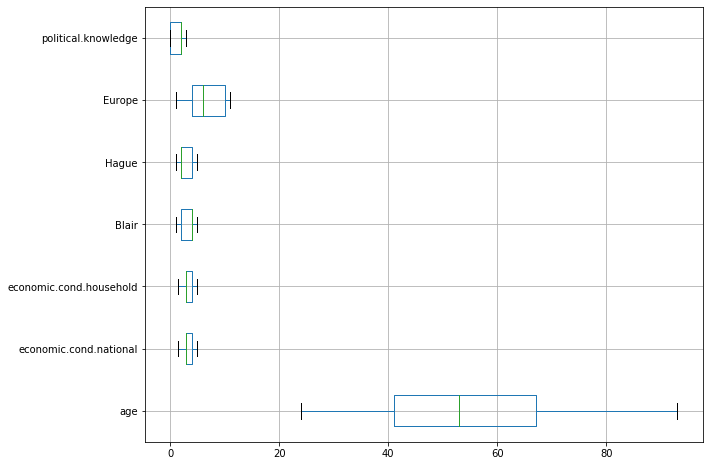

In [212]:
plt.figure(figsize=(10,8))
df[num].boxplot(vert=0)
plt.show()

**Data Preparation**

1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?, Data Split: Split the data into train and test (70:30).

In [213]:
for variable in df.columns:
    if df[variable].dtype == 'object':
        df[variable] = pd.Categorical(df[variable]).codes

In [214]:
df.dtypes

vote                          int8
age                          int64
economic.cond.national     float64
economic.cond.household    float64
Blair                      float64
Hague                      float64
Europe                     float64
political.knowledge        float64
gender                        int8
dtype: object

In [215]:
std_scaler = StandardScaler()
scaled = std_scaler.fit_transform(df)
scaled

array([[ 0.65969231, -0.7161609 , -0.30164793, ..., -1.43733791,
         0.42383219, -0.93673649],
       [ 0.65969231, -1.16211836,  0.87018284, ..., -0.52768351,
         0.42383219,  1.06753608],
       [ 0.65969231, -1.22582657,  0.87018284, ..., -1.13411978,
         0.42383219,  1.06753608],
       ...,
       [ 0.65969231, -1.09841015, -0.30164793, ..., -1.43733791,
         0.42383219,  1.06753608],
       [-1.5158582 ,  0.43058686, -0.30164793, ...,  1.29162531,
         0.42383219,  1.06753608],
       [-1.5158582 ,  1.25879357, -1.47347871, ...,  1.29162531,
        -1.42108441, -0.93673649]])

In [216]:
# Arrange data into independent variables and dependent variables
X = df.drop("vote",axis=1)  ## Features
y = df["vote"]  ## Target

In [217]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [339]:
X_train

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
991,34,2.0,4.0,1.0,4.0,11.0,2.0,0
1274,40,4.0,3.0,4.0,4.0,6.0,0.0,1
649,61,4.0,3.0,4.0,4.0,7.0,2.0,0
677,47,3.0,3.0,4.0,2.0,11.0,0.0,1
538,44,5.0,3.0,4.0,2.0,8.0,0.0,1
...,...,...,...,...,...,...,...,...
717,52,3.0,3.0,4.0,1.0,6.0,2.0,0
908,43,3.0,4.0,2.0,2.0,9.0,2.0,0
1100,74,4.0,3.0,5.0,4.0,11.0,0.0,0
236,31,3.0,3.0,2.0,3.0,6.0,0.0,0


**Modelling**

1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis). Interpret the inferences of both models.

In [340]:
percentage = df.vote.value_counts(normalize = True)
percentage*100

1    69.676994
0    30.323006
Name: vote, dtype: float64

# **Logistic Regression**

In [218]:
LR_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
LR_model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.6s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [219]:
ytrain_predict = LR_model.predict(X_train)
model_score = LR_model.score(X_train, y_train)
print(model_score)
print('')
print(metrics.confusion_matrix(y_train, ytrain_predict))
print('')
print(metrics.classification_report(y_train, ytrain_predict))

0.8341187558906692

[[197 110]
 [ 66 688]]

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



Train AUC: 0.890


<Figure size 720x576 with 0 Axes>

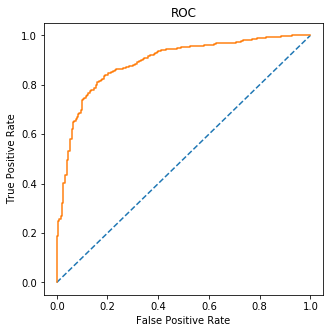

<Figure size 720x576 with 0 Axes>

In [221]:
# predict probabilities
probs = LR_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('Train AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.figure(figsize=(10,8))

In [222]:
ytest_predict = LR_model.predict(X_test)
model_score = LR_model.score(X_test, y_test)
print(model_score)
print('')
print(metrics.confusion_matrix(y_test, ytest_predict))
print('')
print(metrics.classification_report(y_test, ytest_predict))

0.8289473684210527

[[111  42]
 [ 36 267]]

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



Test AUC: 0.890


Text(0.5, 1.0, 'ROC')

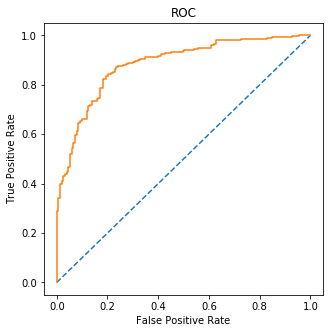

In [223]:
# predict probabilities
probs = LR_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('Test AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

# **LDA**

In [224]:
clf = LinearDiscriminantAnalysis()
LDA_model=clf.fit(X_train,y_train)

In [225]:
ytrain_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print('')
print(metrics.confusion_matrix(y_train, ytrain_predict))
print('')
print(metrics.classification_report(y_train, ytrain_predict))

0.8341187558906692

[[200 107]
 [ 69 685]]

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



Train AUC: 0.890


Text(0.5, 1.0, 'ROC')

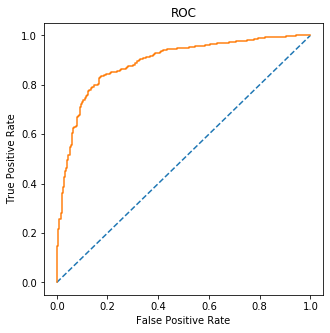

In [226]:
# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('Train AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

In [227]:
ytest_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print('')
print(metrics.confusion_matrix(y_test, ytest_predict))
print('')
print(metrics.classification_report(y_test, ytest_predict))

0.831140350877193

[[111  42]
 [ 35 268]]

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



Test AUC: 0.890


Text(0.5, 1.0, 'ROC')

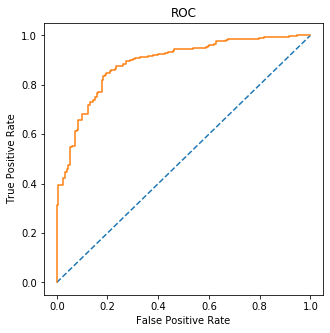

In [228]:
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('Test AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

1.5) Apply KNN Model and Naïve Bayes Model. Interpret the inferences of each model

# KNN model

In [229]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [230]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print('')
print(metrics.confusion_matrix(y_train, y_train_predict))
print('')
print(metrics.classification_report(y_train, y_train_predict))

0.8539114043355325

[[204 103]
 [ 52 702]]

              precision    recall  f1-score   support

           0       0.80      0.66      0.72       307
           1       0.87      0.93      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



Train AUC: 0.923


Text(0.5, 1.0, 'ROC')

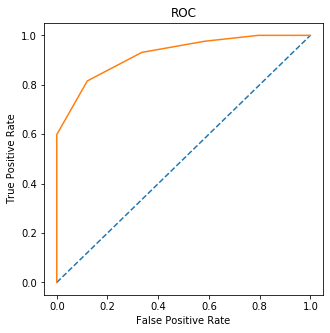

In [231]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('Train AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

In [232]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print('')
print(metrics.confusion_matrix(y_test, y_test_predict))
print('')
print(metrics.classification_report(y_test, y_test_predict))

0.8157894736842105

[[ 99  54]
 [ 30 273]]

              precision    recall  f1-score   support

           0       0.77      0.65      0.70       153
           1       0.83      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.82      0.81       456



Test AUC: 0.923


Text(0.5, 1.0, 'ROC')

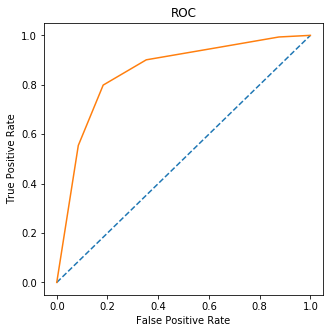

In [233]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('Test AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

# NB model

In [234]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [235]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      
print(model_score)
print('')
print(metrics.confusion_matrix(y_train, y_train_predict))  
print('')
print(metrics.classification_report(y_train, y_train_predict)) 

0.8341187558906692

[[212  95]
 [ 81 673]]

              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



Train AUC: 0.889


Text(0.5, 1.0, 'ROC')

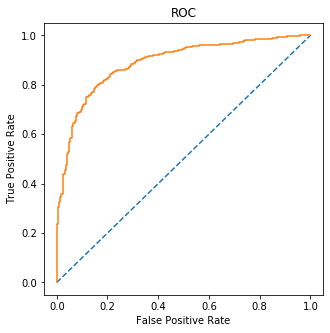

In [236]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('Train AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

In [237]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    
print(model_score)
print('')
print(metrics.confusion_matrix(y_test, y_test_predict)) 
print('')
print(metrics.classification_report(y_test, y_test_predict)) 

0.8223684210526315

[[112  41]
 [ 40 263]]

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



Test AUC: 0.889


Text(0.5, 1.0, 'ROC')

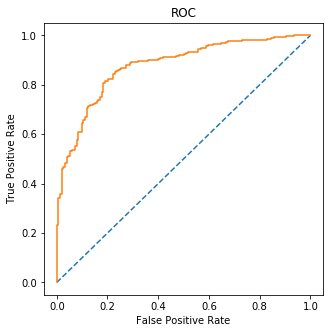

In [239]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('Test AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

1.6) Model Tuning, Bagging and Boosting.

                                                    &
                                                    
1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized.

# Adaptive boosting

In [153]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [154]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print('')
print(metrics.confusion_matrix(y_train, y_train_predict))
print('')
print(metrics.classification_report(y_train, y_train_predict))

0.8501413760603205

[[214  93]
 [ 66 688]]

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [245]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('Train AUC: %.3f' % auc)

Train AUC: 0.912


In [156]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print('')
print(metrics.confusion_matrix(y_test, y_test_predict))
print('')
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702

[[103  50]
 [ 35 268]]

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



In [248]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('Test AUC: %.3f' % auc)

Test AUC: 0.881


# Gradient Boosting

In [250]:
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [251]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print('')
print(metrics.confusion_matrix(y_train, y_train_predict))
print('')
print(metrics.classification_report(y_train, y_train_predict))

0.8925541941564562

[[239  68]
 [ 46 708]]

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [252]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('Train AUC: %.3f' % auc)

Train AUC: 0.951


In [253]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print('')
print(metrics.confusion_matrix(y_test, y_test_predict))
print('')
print(metrics.classification_report(y_test, y_test_predict))

0.8355263157894737

[[105  48]
 [ 27 276]]

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



In [254]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('Test AUC: %.3f' % auc)

Test AUC: 0.951


# Bagging

In [255]:
RF =RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=RF,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [256]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print('')
print(metrics.confusion_matrix(y_train, y_train_predict))
print('')
print(metrics.classification_report(y_train, y_train_predict))

0.9679547596606974

[[277  30]
 [  4 750]]

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [258]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('Train AUC: %.3f' % auc)

Train AUC: 0.997


In [259]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print('')
print(metrics.confusion_matrix(y_test, y_test_predict))
print('')
print(metrics.classification_report(y_test, y_test_predict))

0.8289473684210527

[[104  49]
 [ 29 274]]

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



In [263]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('Test AUC: %.3f' % auc)

Test AUC: 0.997


# SMOTE

In [264]:
from imblearn.over_sampling import SMOTE

In [265]:
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [266]:
## Let's check the shape after SMOTE

X_train_res.shape

(1508, 8)

# Naive Bayes with SMOTE

In [275]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [276]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print('')
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print('')
print(metrics.classification_report(y_train_res ,y_train_predict))

0.8401856763925729

[[632 122]
 [119 635]]

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       754
           1       0.84      0.84      0.84       754

    accuracy                           0.84      1508
   macro avg       0.84      0.84      0.84      1508
weighted avg       0.84      0.84      0.84      1508



In [277]:
# predict probabilities
probs = NB_SM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('Train AUC: %.3f' % auc)

Train AUC: 0.888


In [171]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print('')
print(metrics.confusion_matrix(y_test, y_test_predict))
print('')
print(metrics.classification_report(y_test, y_test_predict))

0.8048245614035088

[[123  30]
 [ 59 244]]

              precision    recall  f1-score   support

           0       0.68      0.80      0.73       153
           1       0.89      0.81      0.85       303

    accuracy                           0.80       456
   macro avg       0.78      0.80      0.79       456
weighted avg       0.82      0.80      0.81       456



In [278]:
# predict probabilities
probs = NB_SM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('Test AUC: %.3f' % auc)

Test AUC: 0.888


# KNN With SMOTE

In [279]:
KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [280]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print('')
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print('')
print(metrics.classification_report(y_train_res, y_train_predict))

0.8919098143236074

[[720  34]
 [129 625]]

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       754
           1       0.95      0.83      0.88       754

    accuracy                           0.89      1508
   macro avg       0.90      0.89      0.89      1508
weighted avg       0.90      0.89      0.89      1508



In [281]:
# predict probabilities
probs = KNN_SM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('Train AUC: %.3f' % auc)

Train AUC: 0.948


In [282]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print('')
print(metrics.confusion_matrix(y_test, y_test_predict))
print('')
print(metrics.classification_report(y_test, y_test_predict))

0.7807017543859649

[[122  31]
 [ 69 234]]

              precision    recall  f1-score   support

           0       0.64      0.80      0.71       153
           1       0.88      0.77      0.82       303

    accuracy                           0.78       456
   macro avg       0.76      0.78      0.77       456
weighted avg       0.80      0.78      0.79       456



In [283]:
# predict probabilities
probs = NB_SM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('Test AUC: %.3f' % auc)

Test AUC: 0.948


In [284]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(NB_SM_model, X_train_res, y_train_res, cv=10)
scores

array([0.78145695, 0.82119205, 0.8410596 , 0.77483444, 0.90728477,
       0.8410596 , 0.8410596 , 0.85430464, 0.78666667, 0.87333333])

In [285]:
scores = cross_val_score(NB_SM_model, X_test, y_test, cv=10)
scores

array([0.76086957, 0.80434783, 0.89130435, 0.80434783, 0.86956522,
       0.86956522, 0.88888889, 0.84444444, 0.75555556, 0.82222222])

**Final Model**

In [343]:
# Models comparison

logistic_train_acc = 0.83
logistic_train_auc = 0.89
logistic_train_recall = 0.91
logistic_train_precision = 0.86
logistic_train_f1 = 0.89

logistic_test_acc = 0.83
logistic_test_auc = 0.89
logistic_test_recall = 0.88
logistic_test_precision = 0.86
logistic_test_f1 = 0.87

LDA_train_acc = 0.83
LDA_train_auc = 0.89
LDA_train_recall = 0.91
LDA_train_precision = 0.86
LDA_train_f1 = 0.89

LDA_test_acc = 0.83
LDA_test_auc = 0.89
LDA_test_recall = 0.88
LDA_test_precision = 0.86
LDA_test_f1 = 0.87


KNN_train_acc = 0.85
KNN_train_auc = 0.92
KNN_train_recall = 0.93
KNN_train_precision = 0.87
KNN_train_f1 = 0.90

KNN_test_acc = 0.81
KNN_test_auc = 0.92
KNN_test_recall = 0.90
KNN_test_precision = 0.83
KNN_test_f1 = 0.87

NB_train_acc = 0.83
NB_train_auc = 0.89
NB_train_recall = 0.89
NB_train_precision = 0.88
NB_train_f1 = 0.88

NB_test_acc = 0.82
NB_test_auc = 0.89
NB_test_recall = 0.87
NB_test_precision = 0.87
NB_test_f1 = 0.87

ADAboost_train_acc = 0.85
ADAboost_train_auc = 0.91
ADAboost_train_recall = 0.91
ADAboost_train_precision = 0.88
ADAboost_train_f1 = 0.90

ADAboost_test_acc = 0.81
ADAboost_test_auc = 0.89
ADAboost_test_recall = 0.88
ADAboost_test_precision = 0.84
ADAboost_test_f1 = 0.86

GRADboost_train_acc = 0.89
GRADboost_train_auc = 0.95
GRADboost_train_recall = 0.94
GRADboost_train_precision = 0.91
GRADboost_train_f1 = 0.93

GRADboost_test_acc = 0.83
GRADboost_test_auc = 0.95
GRADboost_test_recall = 0.91
GRADboost_test_precision = 0.85
GRADboost_test_f1 = 0.88

Bagging_train_acc = 0.97
Bagging_train_auc = 0.100
Bagging_train_recall = 0.99
Bagging_train_precision = 0.96
Bagging_train_f1 = 0.98

Bagging_test_acc = 0.83
Bagging_test_auc = 0.100
Bagging_test_recall = 0.90
Bagging_test_precision = 0.85
Bagging_test_f1 = 0.88

NBsmote_train_acc = 0.84
NBsmote_train_auc = 0.89
NBsmote_train_recall = 0.84
NBsmote_train_precision = 0.84
NBsmote_train_f1 = 0.84

NBsmote_test_acc = 0.80
NBsmote_test_auc = 0.89
NBsmote_test_recall = 0.81
NBsmote_test_precision = 0.89
NBsmote_test_f1 = 0.85

KNNsmote_train_acc = 0.89
KNNsmote_train_auc = 0.95
KNNsmote_train_recall = 0.83
KNNsmote_train_precision = 0.95
KNNsmote_train_f1 = 0.88

KNNsmote_test_acc = 0.78
KNNsmote_test_auc = 0.95
KNNsmote_test_recall = 0.77
KNNsmote_test_precision = 0.88
KNNsmote_test_f1 = 0.82


index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']

data = pd.DataFrame({'logistic Train':[logistic_train_acc,logistic_train_auc,logistic_train_recall,logistic_train_precision,logistic_train_f1],
        'logistic Test':[logistic_test_acc,logistic_test_auc,logistic_test_recall,logistic_test_precision,logistic_test_f1],
                     
       'LDA Train':[LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'LDA Test':[LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1],
                     
        'KNN Train':[KNN_train_acc,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1],
        'KNN Test':[KNN_test_acc,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],
                     
        'NB Train':[NB_train_acc,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1],
        'NB Test':[NB_test_acc,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1],
        
        'ADAboost Train':[ADAboost_train_acc,ADAboost_train_auc,ADAboost_train_recall,ADAboost_train_precision,ADAboost_train_f1],
        'ADAboost Test':[ADAboost_test_acc,ADAboost_test_auc,ADAboost_test_recall,ADAboost_test_precision,ADAboost_test_f1],
                     
        'Bagging Train':[Bagging_train_acc,Bagging_train_auc,Bagging_train_recall,Bagging_train_precision,Bagging_train_f1],
        'Bagging Test':[Bagging_test_acc,Bagging_test_auc,Bagging_test_recall,Bagging_test_precision,Bagging_test_f1],
                    
                     
        'GRADboost Train':[GRADboost_train_acc,GRADboost_train_auc,GRADboost_train_recall,GRADboost_train_precision,GRADboost_train_f1],
        'GRADboost Test':[GRADboost_test_acc,GRADboost_test_auc,GRADboost_test_recall,GRADboost_test_precision,GRADboost_test_f1],
                    
        'NBsmote Train':[NBsmote_train_acc,NBsmote_train_auc,NBsmote_train_recall,NBsmote_train_precision,NBsmote_train_f1],
        'NBsmote Test':[NBsmote_test_acc,NBsmote_test_auc,NBsmote_test_recall,NBsmote_test_precision,NBsmote_test_f1],
                    
        'KNNsmote Train':[KNNsmote_train_acc,KNNsmote_train_auc,KNNsmote_train_recall,KNNsmote_train_precision,KNNsmote_train_f1],
        'KNNsmote Test':[KNNsmote_test_acc,KNNsmote_test_auc,KNNsmote_test_recall,KNNsmote_test_precision,KNNsmote_test_f1],},index=index)

round(data,9)

,logistic Train,logistic Test,LDA Train,LDA Test,KNN Train,KNN Test,NB Train,NB Test,ADAboost Train,ADAboost Test,Bagging Train,Bagging Test,GRADboost Train,GRADboost Test,NBsmote Train,NBsmote Test,KNNsmote Train,KNNsmote Test
Accuracy,0.83,0.83,0.83,0.83,0.85,0.81,0.83,0.82,0.85,0.81,0.97,0.83,0.89,0.83,0.84,0.80,0.89,0.78
AUC,0.89,0.89,0.89,0.89,0.92,0.92,0.89,0.89,0.91,0.89,0.10,0.10,0.95,0.95,0.89,0.89,0.95,0.95
Recall,0.91,0.88,0.91,0.88,0.93,0.90,0.89,0.87,0.91,0.88,0.99,0.90,0.94,0.91,0.84,0.81,0.83,0.77
Precision,0.86,0.86,0.86,0.86,0.87,0.83,0.88,0.87,0.88,0.84,0.96,0.85,0.91,0.85,0.84,0.89,0.95,0.88
F1 Score,0.89,0.87,0.89,0.87,0.90,0.87,0.88,0.87,0.90,0.86,0.98,0.88,0.93,0.88,0.84,0.85,0.88,0.82


**Inference**

1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective.

Please find answer in Business report

# Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

1.President Franklin D. Roosevelt in 1941

2.President John F. Kennedy in 1961

3.President Richard Nixon in 1973

*Find the number of characters, words and sentences for the mentioned documents. – 3 Marks
(Hint: use .words(), .raw(), .sent() for extracting counts)

*Remove all the stopwords from all the three speeches. – 3 Marks

*Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) – 3 Marks

*Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) – 3 Marks

Code Snippet to extract the three speeches:

"
import nltk

nltk.download('inaugural')

from nltk.corpus import inaugural

inaugural.fileids()

inaugural.raw('1941-Roosevelt.txt')

inaugural.raw('1961-Kennedy.txt')

inaugural.raw('1973-Nixon.txt')
"

2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

In [346]:
# Load the code

nltk.download('inaugural')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [347]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [348]:
roosevelt = inaugural.raw('1941-Roosevelt.txt')
roosevelt

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [349]:
kennedy = inaugural.raw('1961-Kennedy.txt')
kennedy

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [350]:
nixon = inaugural.raw('1973-Nixon.txt')
nixon

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [428]:
len(inaugural.fileids())

58

**Roosevelt**

In [446]:
# No of characters in Roosevelt speech

len(roosevelt)

7571

In [447]:
# No of characters without space

lngtr= roosevelt.replace(" ","")
len(lngtr)

6249

In [448]:
# No of words

nwr = len(roosevelt.split())
str(nwr)

'1360'

In [510]:
# No of sentences in roosevelt speech

print(len(sent_tokenize(roosevelt)))

68


**Kennedy**

In [449]:
# No of characters in Kennedy speech

len(kennedy)

7618

In [451]:
# No of characters without space

lngtk= kennedy.replace(" ","")
len(lngtk)

6255

In [452]:
# No of words

nwk = len(kennedy.split())
str(nwk)

'1390'

In [511]:
# No of sentences in kennedy speech

print(len(sent_tokenize(kennedy)))

52


**Nixon**

In [454]:
# No of characters in nixon speech

len(nixon)

9991

In [455]:
# No of characters without space

lngtn= nixon.replace(" ","")
len(lngtn)

8223

In [457]:
# No of words

nwn = len(nixon.split())
str(nwn)

'1819'

In [512]:
# No of sentences in kennedy speech

print(len(sent_tokenize(nixon)))

68


In [344]:
data = {'Name':['Roos', 'Ken', 'Nix'], 
        'No of char':[7571, 7618, 9991],
        'No of char without WS':[6249, 6255, 8223],
        'No of words':[1360,1390, 1819],
        'No of sents':[68,52,68],}  

df = pd.DataFrame(data)

df 

,Name,No of char,No of char without WS,No of words,No of sents
0,Roos,7571,6249,1360,68
1,Ken,7618,6255,1390,52
2,Nix,9991,8223,1819,68


2.2) Remove all the stopwords from the three speeches.

In [351]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [318]:
# Roosevelt
  
stop_words = set(stopwords.words('english'))  
  
word_tokens = word_tokenize(roosevelt)  
  
filtered_sentence1 = [w for w in word_tokens if not w in stop_words]  
  
filtered_sentence1 = []  
  
for w in word_tokens:  
    if w not in stop_words:  
        filtered_sentence1.append(w)   
        
print(filtered_sentence1)  

['On', 'national', 'day', 'inauguration', 'since', '1789', ',', 'people', 'renewed', 'sense', 'dedication', 'United', 'States', '.', 'In', 'Washington', "'s", 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', '.', 'In', 'Lincoln', "'s", 'day', 'task', 'people', 'preserve', 'Nation', 'disruption', 'within', '.', 'In', 'day', 'task', 'people', 'save', 'Nation', 'institutions', 'disruption', 'without', '.', 'To', 'us', 'come', 'time', ',', 'midst', 'swift', 'happenings', ',', 'pause', 'moment', 'take', 'stock', '--', 'recall', 'place', 'history', ',', 'rediscover', 'may', '.', 'If', ',', 'risk', 'real', 'peril', 'inaction', '.', 'Lives', 'nations', 'determined', 'count', 'years', ',', 'lifetime', 'human', 'spirit', '.', 'The', 'life', 'man', 'three-score', 'years', 'ten', ':', 'little', ',', 'little', 'less', '.', 'The', 'life', 'nation', 'fullness', 'measure', 'live', '.', 'There', 'men', 'doubt', '.', 'There', 'men', 'believe', 'democracy', ',', 'form', 'Government', 'fra

In [311]:
# Kennedy
  
stop_words = set(stopwords.words('english'))  
  
word_tokens = word_tokenize(kennedy)  
  
filtered_sentence2 = [w for w in word_tokens if not w in stop_words]  
  
filtered_sentence2 = []  
  
for w in word_tokens:  
    if w not in stop_words:  
        filtered_sentence2.append(w)  
         
print(filtered_sentence2)

['Vice', 'President', 'Johnson', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'observe', 'today', 'victory', 'party', ',', 'celebration', 'freedom', '--', 'symbolizing', 'end', ',', 'well', 'beginning', '--', 'signifying', 'renewal', ',', 'well', 'change', '.', 'For', 'I', 'sworn', 'I', 'Almighty', 'God', 'solemn', 'oath', 'forebears', 'l', 'prescribed', 'nearly', 'century', 'three', 'quarters', 'ago', '.', 'The', 'world', 'different', '.', 'For', 'man', 'holds', 'mortal', 'hands', 'power', 'abolish', 'forms', 'human', 'poverty', 'forms', 'human', 'life', '.', 'And', 'yet', 'revolutionary', 'beliefs', 'forebears', 'fought', 'still', 'issue', 'around', 'globe', '--', 'belief', 'rights', 'man', 'come', 'generosity', 'state', ',', 'hand', 'God', '.', 'We', 'dare', 'forget', 'today', 'heirs', 'first', 'revolution', '.', 'Let', '

In [323]:
# nixon
  
stop_words = set(stopwords.words('english'))  
  
word_tokens = word_tokenize(nixon)  
  
filtered_sentence3 = [w for w in word_tokens if not w in stop_words]  
  
filtered_sentence3 = []  
  
for w in word_tokens:  
    if w not in stop_words:  
        filtered_sentence3.append(w)  
         
print(filtered_sentence3)

['Mr.', 'Vice', 'President', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs.', 'Eisenhower', ',', 'fellow', 'citizens', 'great', 'good', 'country', 'share', 'together', ':', 'When', 'met', 'four', 'years', 'ago', ',', 'America', 'bleak', 'spirit', ',', 'depressed', 'prospect', 'seemingly', 'endless', 'war', 'abroad', 'destructive', 'conflict', 'home', '.', 'As', 'meet', 'today', ',', 'stand', 'threshold', 'new', 'era', 'peace', 'world', '.', 'The', 'central', 'question', 'us', ':', 'How', 'shall', 'use', 'peace', '?', 'Let', 'us', 'resolve', 'era', 'enter', 'postwar', 'periods', 'often', ':', 'time', 'retreat', 'isolation', 'leads', 'stagnation', 'home', 'invites', 'new', 'danger', 'abroad', '.', 'Let', 'us', 'resolve', 'become', ':', 'time', 'great', 'responsibilities', 'greatly', 'borne', ',', 'renew', 'spirit', 'promise', 'America', 'enter', 'third', 'century', 'nation', '.', 'This', 'past', 'year', 'saw', 'far-reaching', 'results', 'new', '

2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [352]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [331]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)


all_words = (w.lower() for w in inaugural.words())
all_words_clean = [word for word in all_words if word not in stopwords]



all_words_freq = nltk.FreqDist(all_words_clean)

word_features = [item[0] for item in all_words_freq.most_common(3)]

In [332]:
word_features

['government', 'people', 'us']

2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

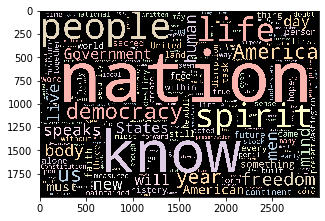

In [357]:
# Import package
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(roosevelt)

plt.imshow(wordcloud)

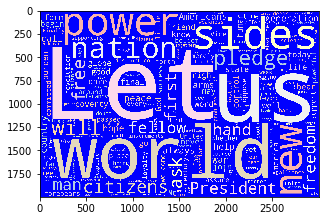

In [358]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='blue', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(kennedy)

plt.imshow(wordcloud)

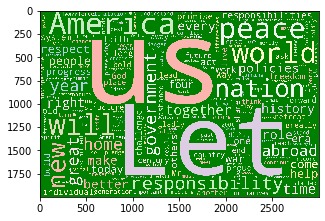

In [360]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='green', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(nixon)

plt.imshow(wordcloud)

                                                   **THE END**